In [1]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import datashader as ds
import datashader.transfer_functions as tf
from datashader.colors import inferno
from datashader.utils import export_image

# Lecture du Fichier Component Size

In [2]:
# Chemin vers le fichier Parquet
chemin_fichier_parquet = "./local/component_size/part-00000-e6d8696c-b587-4027-ab29-734e311a33fe-c000.snappy.parquet"

# Lecture du fichier Parquet et création du DataFrame
try:
    data = pd.read_parquet(chemin_fichier_parquet, engine='pyarrow')
    # Afficher le DataFrame
    print(data.head())
except Exception as e:
    print("Une erreur s'est produite lors de la lecture du fichier Parquet :", e)

   compID  size
0    7044     5
1   16965     5
2   31427     5
3   34321     5
4   35262     5


In [3]:
data.shape

(67957171, 2)

# Création d'un histogramme

In [3]:
sns.histplot(df, x="size")

: 

In [4]:

# sns.histplot(data=df['size'])

# # Ajoutez des titres et des labels d'axes
# plt.title('Histogramme des valeurs')
# plt.xlabel('Taille')
# plt.ylabel('Fréquence')

# # Affichez l'histogramme
# plt.show()

: 

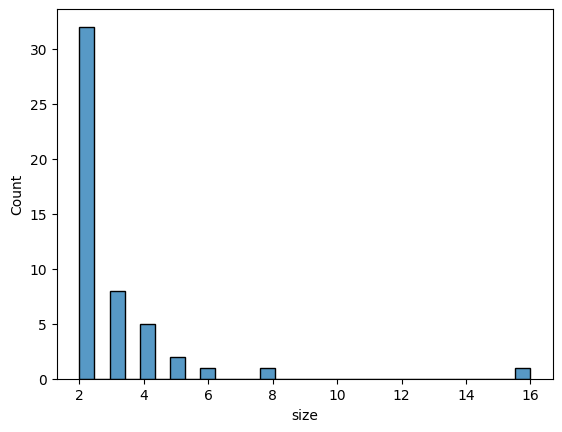

In [7]:
# Échantillonner aléatoirement vos données
sampled_data = df.sample(n=50)  # Vous pouvez ajuster le nombre d'échantillons selon vos besoins

# Tracer l'histogramme avec seaborn
sns.histplot(sampled_data['size'], bins=30)  # Remplacez 'colonne_données' par le nom de votre colonne de données
plt.show()

In [9]:
# Agréger les données avec Datashader
cvs = ds.Canvas(plot_width=1000, plot_height=1000)
agg = cvs.density_heatmap(df, x='size' , y='compID')
img = tf.shade(agg, cmap=inferno, how='eq_hist')

# Convertir l'image Datashader en Plotly figure
fig = px.imshow(img.to_pil(), color_continuous_scale='inferno')

# Ajouter des informations sur l'axe x
fig.update_layout(
    xaxis_title="Taille",
    yaxis_title="Count"
)

# Afficher la figure Plotly
fig.show()

AttributeError: 'Canvas' object has no attribute 'density_heatmap'